In [288]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [290]:
df=pd.read_csv('PJME_hourly.csv')

In [292]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [294]:
df=df.set_index('Datetime')

In [296]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [298]:
palettecol=sns.color_palette()
palettecol

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<Axes: title={'center': 'PJME hourly energy usage in MW'}, xlabel='Datetime'>

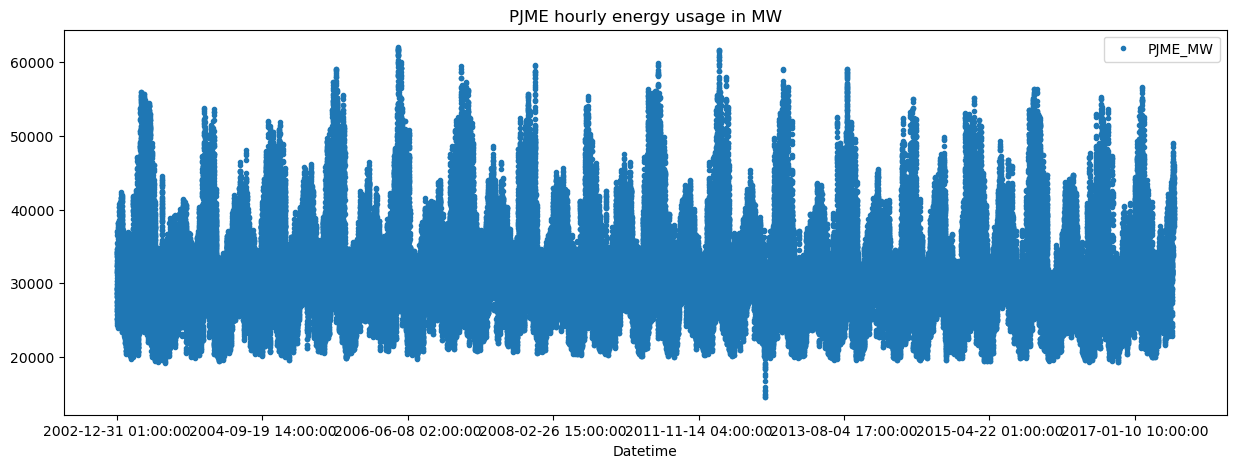

In [300]:
df.plot(style='.',figsize=(15,5),color=palettecol[0],title='PJME hourly energy usage in MW')

In [233]:
#index is in object type(so lets change it to datetime

In [302]:
df.index=pd.to_datetime(df.index)

<Axes: title={'center': 'PJME hourly energy usage in MW'}, xlabel='Datetime'>

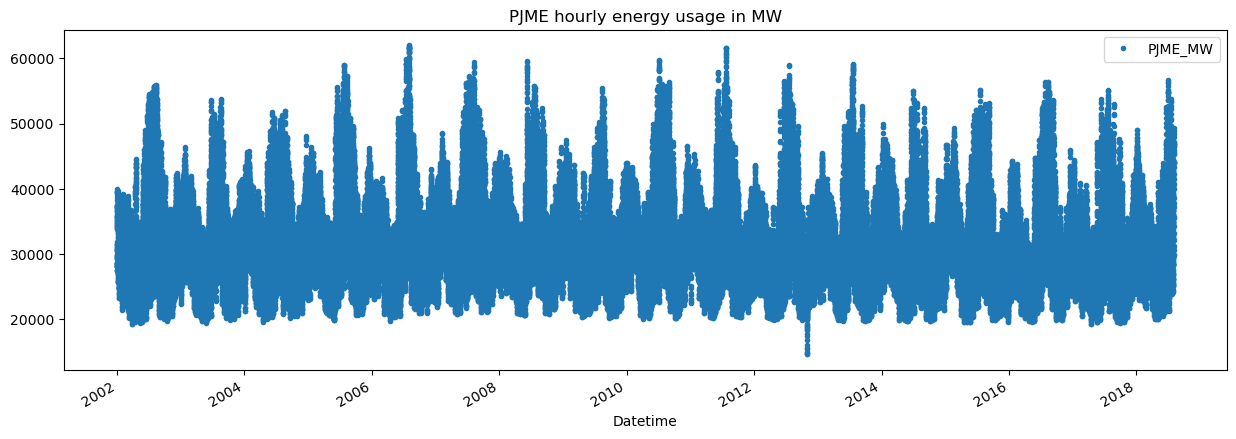

In [304]:
df.plot(style='.',figsize=(15,5),color=palettecol[0],title='PJME hourly energy usage in MW')

In [236]:
#plotting the weekly data

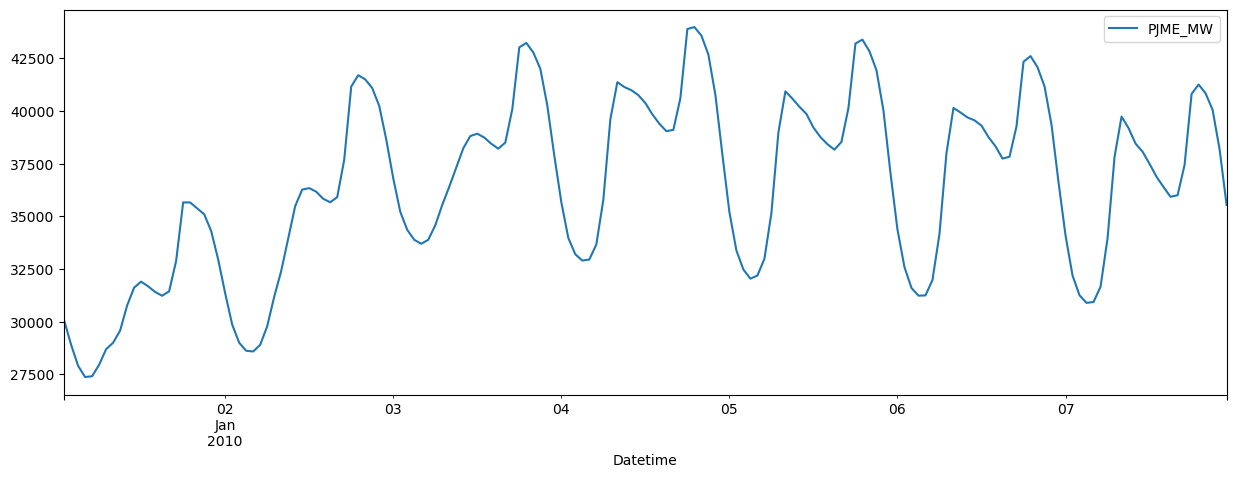

In [306]:
df = df.sort_index()
df.loc[(df.index>'01-01-2010') & (df.index<'01-08-2010')].plot(figsize=(15,5))
plt.show()

In [308]:
df['hour']=df.index.hour
df['day_of_week']=df.index.dayofweek
df['quarter']=df.index.quarter
df['month']=df.index.month
df['year']=df.index.year
df['dayofyear']=df.index.dayofyear

In [310]:
df.tail()

,PJME_MW,hour,day_of_week,quarter,month,year,dayofyear
Datetime,,,,,,,
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214
2018-08-02 23:00:00,38500.0,23,3,3,8,2018,214
2018-08-03 00:00:00,35486.0,0,4,3,8,2018,215


In [240]:
#visualize the hourly usage

C:\Users\sriha\AppData\Local\Temp\ipykernel_16488\1174564216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='PJME_MW',palette='coolwarm')


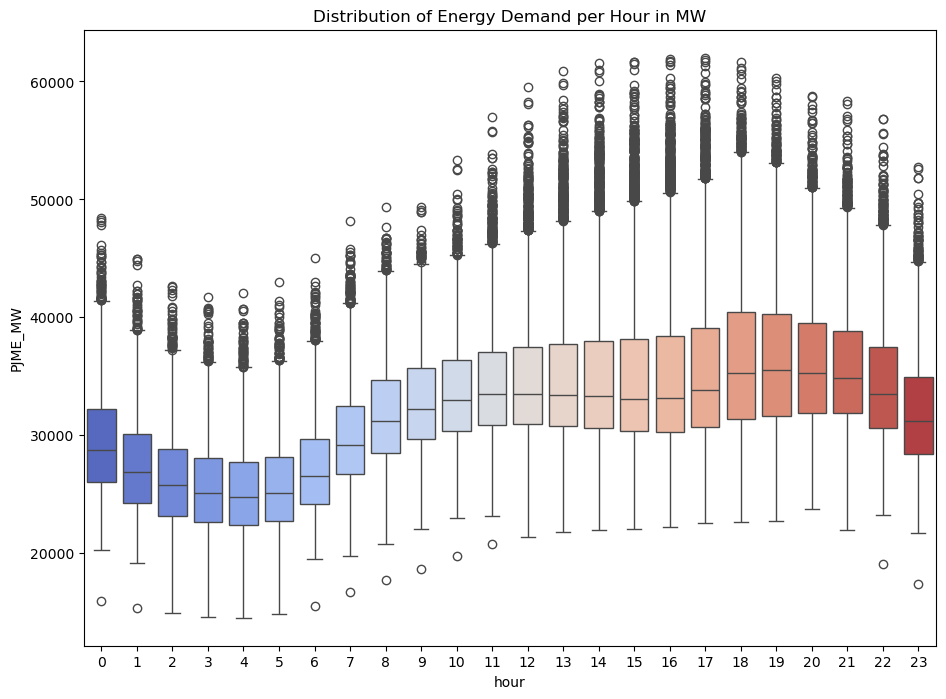

In [312]:
plt.figure(figsize=(11,8))
sns.boxplot(data=df, x='hour', y='PJME_MW',palette='coolwarm')
plt.title("Distribution of Energy Demand per Hour in MW")
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_16488\1347780887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW',palette='Blues')


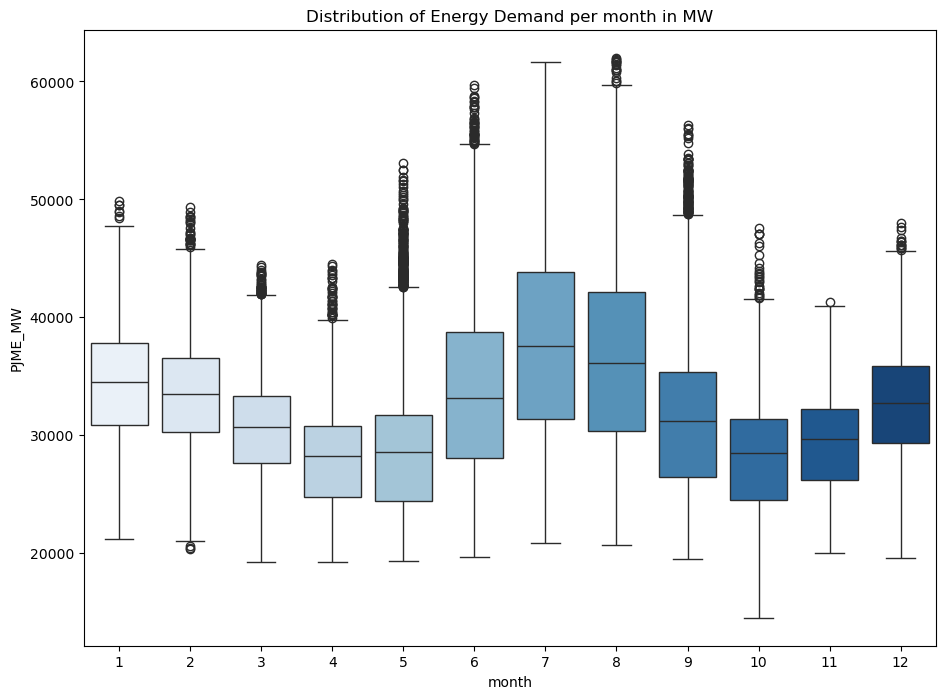

In [242]:
plt.figure(figsize=(11,8))
sns.boxplot(data=df, x='month', y='PJME_MW',palette='Blues')
plt.title("Distribution of Energy Demand per month in MW")
plt.show()


In [314]:
X = df.drop("PJME_MW", axis=1)   
y = df["PJME_MW"]            


In [316]:
X.head()

,hour,day_of_week,quarter,month,year,dayofyear
Datetime,,,,,,
2002-01-01 01:00:00,1,1,1,1,2002,1
2002-01-01 02:00:00,2,1,1,1,2002,1
2002-01-01 03:00:00,3,1,1,1,2002,1
2002-01-01 04:00:00,4,1,1,1,2002,1
2002-01-01 05:00:00,5,1,1,1,2002,1


In [318]:
X.shape

(145366, 6)

In [322]:
y.head()

Datetime
2002-01-01 01:00:00    30393.0
2002-01-01 02:00:00    29265.0
2002-01-01 03:00:00    28357.0
2002-01-01 04:00:00    27899.0
2002-01-01 05:00:00    28057.0
Name: PJME_MW, dtype: float64

In [385]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
#splitting the data
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
    )
    #training the data
    model.fit(X_train, y_train)
    #testing the data
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"Fold RMSE: {rmse:.2f}")

print("\nAverage RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Fold RMSE: 3828.71
Fold RMSE: 3727.60
Fold RMSE: 4072.57
Fold RMSE: 3997.71
Fold RMSE: 4246.50

Average RMSE: 3974.617848114764
Standard Deviation of RMSE: 182.40183128769777


In [405]:
import pickle

# Train final model on all available data
final_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
)
final_xgb.fit(X, y)
pickle.dump(final_xgb, open("xgboost_model.pkl", "wb"))

In [248]:
## Time Series Forecasting with ARIMA
#  ARIMA Time Series Forecasting
#Now we will apply the SARIMA (AutoRegressive Integrated Moving Average) model for forecasting energy demand. 
#Unlike XGBoost, ARIMA is a statistical model that works directly on time series data without feature engineering.


In [347]:
#train test split

In [351]:
daily = df["PJME_MW"].resample("D").mean()
train = daily[:-365]
test  = daily[-365:]

In [353]:
train.shape

(5694,)

In [355]:
test.shape

(365,)

In [359]:
df.shape

(145366, 7)

In [363]:
print(f"Train period: {train.index.min().date()} → {train.index.max().date()} ({len(train)} days)")
print(f"Test  period: {test.index.min().date()} → {test.index.max().date()} ({len(test)} days)")

Train period: 2002-01-01 → 2017-08-03 (5694 days)
Test  period: 2017-08-04 → 2018-08-03 (365 days)


In [365]:
#fit the sarima

In [407]:
order = (1,1,1)
seasonal_order = (1,1,1,7)   # weekly seasonality for daily data

model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
pickle.dump(res, open("sarima_model.pkl", "wb"))
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           PJME_MW   No. Observations:                 6029
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -53683.329
Date:                           Tue, 19 Aug 2025   AIC                         107376.657
Time:                                   16:39:32   BIC                         107410.165
Sample:                               01-01-2002   HQIC                        107388.292
                                    - 07-04-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2858      0.032     -8.942      0.000      -0.348      -0.223
ma.L1          0.5588      0.029     19.602

In [373]:
pred=res.get_forecast(steps=len(test))
pred_mean=pred.predicted_mean
pred_ci=pred.conf_int()

In [375]:
#metrics

In [377]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred_mean)
mape = mean_absolute_percentage_error(test, pred_mean) * 100
rmse = np.sqrt(mean_squared_error(test, pred_mean))

print("MAE :", mae)
print("MAPE:", mape, "%")
print("RMSE:", rmse)


MAE : 6763.056380006801
MAPE: 23.393217002664013 %
RMSE: 7562.434202458772


In [379]:
#plot test train predictions

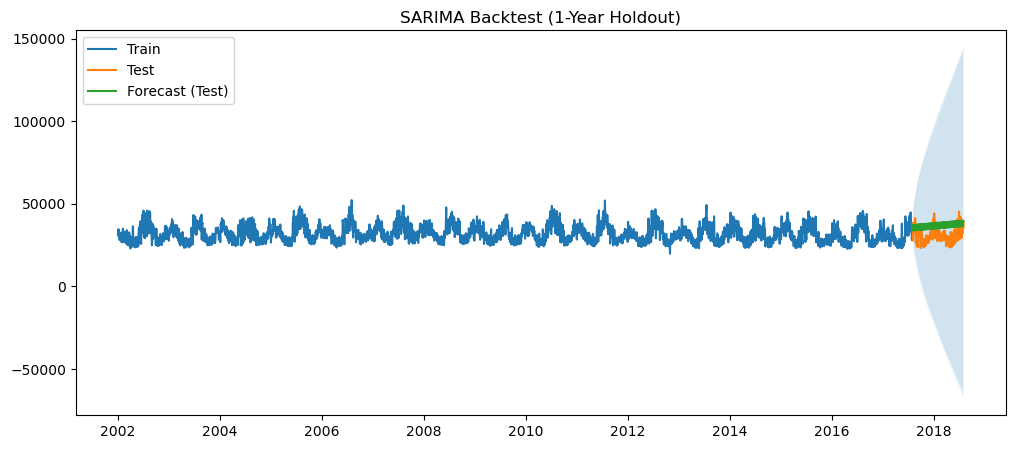

In [381]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(pred_mean.index, pred_mean, label="Forecast (Test)")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], alpha=0.2)
plt.legend(); plt.title("SARIMA Backtest (1-Year Holdout)")
plt.show()
